1) Wczytaj dane z pliku daneXX.txt. Zaproponuj i zrealizuj podział tych danych na dane treningowe i dane testowe,

2) Zaproponuj liniowy model parametryczny Model 1. Określ parametry modelu stosując metodę najmniejszych kwadratów dla danych treningowych,

3) Zweryfikuj poprawność Modelu 1,

4) Zaproponuj bardziej złożony, model regresji nieliniowej Model 2. Określ parametry modelu stosując metodę najmniejszych kwadratów dla danych treningowych,

5) Zweryfikuj poprawność Modelu 2,

6) Porównaj oba modele.

gdzie XX jest numerem zestawu. W każdej linii pliku pierwsza liczba określa
wejście a druga wartość wyjścia

Zbiór danych znajduje się w pliku Dane_Drojekt_4.zip proszę przetestowąć programy na wszystkich plikach danych.

In [1]:
from google.colab import drive
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
def generate_left_matrix(x_coordinates, power):
    max_power = power + power

    left_matrix = []

    row_index = 0

    while row_index <= power:
        row = []
        
        column_index = 0

        current_power = max_power

        while column_index <= power:
            row.append(np.sum(x_coordinates ** current_power))

            current_power -= 1
            column_index += 1

        row_index += 1
        max_power -= 1

        left_matrix.append(row)

    return left_matrix

In [3]:
def generate_right_matrix(x_coordinates, y_coordinates, power):
    right_matrix = []

    while power >= 0:
        right_matrix.append([np.sum((x_coordinates ** power) * y_coordinates)])

        power -= 1

    return right_matrix

In [4]:
def print_ws(ws):
    max_power = len(ws) - 1

    index = len(ws) - 1

    while index >= 0:
        print("w{} = {}".format(index, ws[max_power - index][0]))

        index -= 1

In [5]:
def calculate_sum_of_squared_errors(ws, x_coordinates, y_coordinates):
    max_power = len(ws) - 1

    point_index = 0
    
    number_of_points = len(x_coordinates)

    sum_of_squared_errors = 0

    while point_index < number_of_points:
        x = x_coordinates[point_index]
        y = y_coordinates[point_index]

        index = 0

        output = 0

        while index <= max_power:
            output += (ws[index][0] * (x ** (max_power - index)))

            index += 1

        error = y - output

        sum_of_squared_errors += (error ** 2)

        point_index += 1
    
    return sum_of_squared_errors

In [6]:
def create_function(ws, x_linspace):
    function = 0

    max_power = len(ws) - 1

    index = max_power

    while index >= 0:
        function += (ws[index][0] * (x_linspace ** (max_power - index)))

        index -= 1

    return function

In [7]:
def generate_model(file_number, power):
    file = open(
        "/content/drive/MyDrive/miwProjects/project4/dane/dane{}.txt".format(
            file_number
        )
    )

    x_coordinates = []
    y_coordinates = []

    for row in file:
        point = row.split(" ")
        x_coordinates.append(float(point[0]))
        y_coordinates.append(float(point[1]))

    x_train, x_test, y_train, y_test = train_test_split(
        x_coordinates, y_coordinates, test_size = 0.25, random_state = 1
    )

    xs = np.array(x_train)
    ys = np.array(y_train)

    n = len(x_train)

    left_matrix = np.array(generate_left_matrix(xs, power))
    left_matrix = np.linalg.inv(left_matrix)

    right_matrix = np.array(generate_right_matrix(xs, ys, power))

    ws = left_matrix @ right_matrix;

    print_ws(ws)

    sum_of_squared_errors = calculate_sum_of_squared_errors(
        ws, x_train, y_train
    )

    print("sum of squared errors: {}".format(sum_of_squared_errors))

    x_linspace = np.linspace(min(x_coordinates), max(x_coordinates), 100)

    function = create_function(ws, x_linspace)

    plt.plot(x_coordinates, y_coordinates, "y*")
    plt.plot(x_linspace, function, "y")
    plt.plot(x_test, y_test, "go")
    plt.title("file №{}, power {}".format(file_number, power))
    plt.show()

w4 = -0.0657264361878039
w3 = -0.13519575152542948
w2 = 0.843814910260699
w1 = 1.7122526209297728
w0 = -0.2405380615261894
sum of squared errors: 3.5797530444341668


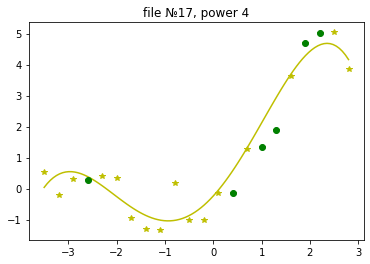

In [8]:
generate_model(file_number = 17, power = 4)